Set up est import

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

In [ ]:
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium[box2d] --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 22.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
import io
import os
import glob
import torch
import base64

import numpy as np
import matplotlib.pyplot as plt

import sys
import gymnasium
sys.modules["gym"] = gymnasium

import stable_baselines3
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env

import gymnasium as gym
from gym import spaces
from gym.envs.box2d.lunar_lander import *
from gym.wrappers.monitoring.video_recorder import VideoRecorder

**Fonction pour obtenir la vidéo :**

In [3]:
import os
from IPython.display import HTML
from base64 import b64encode
from pyvirtualdisplay import Display

# Créer le répertoire pour stocker la ou les vidéos
os.makedirs("./video", exist_ok=True)

# Démarrer un affichage virtuel pour rendre l'environnement
display = Display(visible=False, size=(1400, 900))
_ = display.start()

# Définir des fonctions utilitaires pour enregistrer et afficher des vidéos de l'environnement gym
# Pour activer l'enregistrement vidéo, utilisez simplement "env = wrap_env(env)"
def render_mp4(videopath: str) -> str:
    """
    Génère une représentation en chaîne encodée en base64 de la vidéo MP4
    située au chemin spécifié.
    """
    mp4_file = open(videopath, 'rb').read()
    base64_encoded_mp4 = b64encode(mp4_file).decode()
    return f'<video width=400 controls><source src="data:video/mp4;' \
           f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'


ModuleNotFoundError: No module named 'pyvirtualdisplay'

# Setup du model

In [ ]:
# Configuration des couches du réseau de neurones.
nn_layers = [256, 128, 128]

# Taux d'apprentissage pour la descente de gradient.
learning_rate = 0.0001

# Répertoire de journalisation
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Création de l'environnement
env_name = 'LunarLander-v2'
env = gym.make(env_name)
env = stable_baselines3.common.monitor.Monitor(env, log_dir)

# Callback pour évaluer périodiquement les performances de l'agent et enregistrer les résultats.
callback = stable_baselines3.common.callbacks.EvalCallback(env, log_path=log_dir, deterministic=True)

# Paramètres de politique pour le réseau de neurones
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=nn_layers)

# Créer le modèle DQN (Deep Q-Network)
model = stable_baselines3.dqn.DQN("MlpPolicy", env,
                                  policy_kwargs=policy_kwargs,
                                  learning_rate=learning_rate,
                                  batch_size=1,
                                  buffer_size=1,
                                  learning_starts=1,
                                  gamma=0.99,
                                  tau=1,
                                  target_update_interval=1,
                                  train_freq=(1, "step"),  # entraîner le réseau à chaque étape.
                                  max_grad_norm=10,
                                  exploration_initial_eps=1,
                                  exploration_fraction=0.5,
                                  gradient_steps=1,
                                  seed=1,
                                  verbose=0)


**Lunar Lander sans apprentissage :**

In [ ]:
# Création de l'environnement
env = gym.make(env_name, render_mode="rgb_array")

# Initialisation de l'enregistreur vidéo
vid = VideoRecorder(env, path=f"video/{env_name}_pretraining.mp4")

# Réinitialisation de l'observation
observation = env.reset()[0]

# Initialisation de la récompense totale
total_reward = 0

# Initialisation de la variable indiquant si l'épisode est terminé
done = False

# Boucle principale d'interaction avec l'environnement
while not done:
    # Rendu de l'environnement pour capturer un frame
    frame = env.render()

    # Capture du frame pour la vidéo
    vid.capture_frame()

    # Prédiction de l'action à prendre par l'agent
    action, states = model.predict(observation, deterministic=True)

    # Exécution de l'action dans l'environnement
    observation, reward, done, info, _ = env.step(action)

    # Ajout de la récompense à la récompense totale
    total_reward += reward

# Fermeture de l'enregistreur vidéo et de l'environnement
vid.close()
env.close()

# Affichage de la récompense totale obtenue
print(f"\nRécompense totale : {total_reward}")

# Affichage de la vidéo en HTML
html = render_mp4(f"video/{env_name}_pretraining.mp4")
HTML(html)


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Récompense totale : -450.5362529847626


Commencons l'apprentissage

In [ ]:
# Entraînement du modèle sur un nombre total de pas de temps égal à 100 000
# L'intervalle de journalisation est fixé à 10, ce qui signifie que les performances de l'entraînement seront imprimées toutes les 10 épisodes.
model.learn(total_timesteps=100000, log_interval=10, callback=callback)

Eval num_timesteps=6009, episode_reward=-104.26 +/- 67.47
Episode length: 178.60 +/- 27.88
Eval num_timesteps=16009, episode_reward=-18.76 +/- 192.89
Episode length: 253.40 +/- 63.05
New best mean reward!
Eval num_timesteps=26009, episode_reward=-33.70 +/- 76.88
Episode length: 139.60 +/- 44.76
Eval num_timesteps=36009, episode_reward=16.16 +/- 151.84
Episode length: 489.80 +/- 50.23
New best mean reward!
Eval num_timesteps=46009, episode_reward=-234.78 +/- 42.43
Episode length: 564.80 +/- 202.33
Eval num_timesteps=56009, episode_reward=145.12 +/- 104.32
Episode length: 571.40 +/- 73.71
New best mean reward!
Eval num_timesteps=66009, episode_reward=-76.26 +/- 15.16
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=76009, episode_reward=145.09 +/- 124.23
Episode length: 314.00 +/- 78.17
Eval num_timesteps=86009, episode_reward=-36.38 +/- 13.55
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=96009, episode_reward=172.17 +/- 59.76
Episode length: 825.60 +/- 230.03
New best mean rewa

Affichons le résultat aprés aprentissage

In [ ]:
env = gym.make(env_name, render_mode="rgb_array")
vid = VideoRecorder(env, path=f"video/{env_name}_learned.mp4")
observation = env.reset()[0]

total_reward = 0
done = False
while not done:
  frame = env.render()
  vid.capture_frame()
  action, states = model.predict(observation, deterministic=True)
  observation, reward, done, info, _ = env.step(action)
  total_reward += reward
vid.close()
env.close()
print(f"\nTotal reward: {total_reward}")

html = render_mp4(f"video/{env_name}_learned.mp4")
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: 250.08704316077373


Affichage d''un graphe montrant l'apprentissage celon le temps

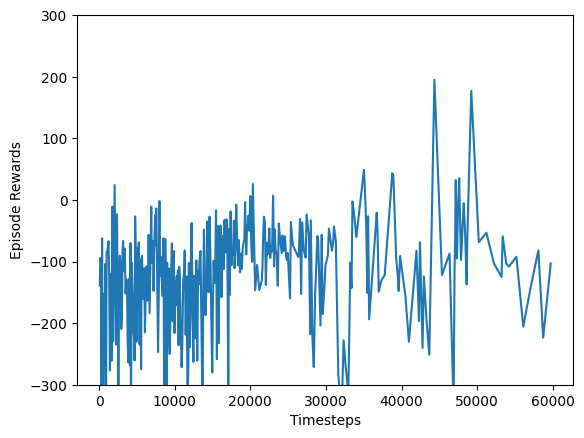

In [ ]:
x, y = ts2xy(load_results(log_dir), 'timesteps')
plt.plot(x, y)
plt.ylim([-300, 300])
plt.xlabel('Timesteps')
plt.ylabel('Episode Rewards')
plt.show()